Data Setup

In [34]:
with open("This Side of Paradise.txt", "r", encoding="utf8") as myfile:
    tsop_data = myfile.read().split("CHAPTER 5. The Egotist Becomes a Personage\n")[1].split("End of Project Gutenberg's This Side of Paradise, by F. Scott Fitzgerald")[0].strip()
    

In [35]:
with open("The Beautiful and Damned.txt", "r", encoding="latin-1") as myfile:
    tbad_data = myfile.read().split("BOOK ONE\n\n\n")[1].split("End of the Project Gutenberg EBook of The Beautiful and Damned, by F. Scott Fitzgerald")[0].strip()

In [36]:
with open("The Great Gatsby.txt", "r", encoding="utf8") as myfile:
    tgg_data = myfile.read().split("Thomas Parke d’Invilliers\n")[1].split("*** END OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***")[0].strip()

Data Modifications

In [37]:
import re

# This Side of Paradise 
tsop_data = re.sub(r'BOOK ONE', '', tsop_data)
tsop_data = re.sub(r'BOOK TWO', '', tsop_data)
tsop_data = re.sub(r'CHAPTER [12345]', '', tsop_data)
tsop_data = re.sub('(--)|(_)', ' ', tsop_data)
tsop_data = re.sub(r"\s+", " ", tsop_data)
tsop_data = re.sub(u"(\u201c|\u201d)", '"', tsop_data)
tsop_data = re.sub(r'—', '', tsop_data)

# The Beautiful and Damned
tbad_data = re.sub(r'CHAPTER [IVX]', '', tbad_data)
tbad_data = re.sub(r'[*]', '', tbad_data)
tbad_data = re.sub(r'BOOK ONE', '', tbad_data)
tbad_data = re.sub(r'BOOK TWO', '', tbad_data)
tbad_data = re.sub(r'BOOK THREE', '', tbad_data)
tbad_data = re.sub('(--)|(_)', ' ', tbad_data)
tbad_data = re.sub(r"\s+", " ", tbad_data)
tbad_data = re.sub(u"(\u2018|\u2019)", "'", tbad_data)
tbad_data = re.sub(u"(\u201c|\u201d)", '"', tbad_data)
tbad_data = re.sub(r'ANTHONY PATCH', '', tbad_data)

# The Great Gatsby
tgg_data = re.sub('--', ' ', tgg_data)
tgg_data = re.sub(r"\s+", " ", tgg_data)
tgg_data = re.sub(r'[IVX]+\s', ' ', tgg_data)
tgg_data = re.sub(u"(\u2018|\u2019)", "'", tgg_data)
tgg_data = re.sub(u"(\u201c|\u201d)", '"', tgg_data)
tgg_data = re.sub('------------------------------------------------------------------------', '', tgg_data)



print("Total words in This Side of Paradise:",len(tsop_data))
print("Total words in The Beautiful and Damned:",len(tbad_data))
print("Total words in The Great Gatsby:",len(tgg_data))

Total words in This Side of Paradise: 409873
Total words in The Beautiful and Damned: 713573
Total words in The Great Gatsby: 264865


Unique Words

In [38]:
def get_word_set(text):
    word_set = {word.lower() for word in re.sub(r"[^\w\s']+", ' ', text).split()}
    word_set.discard('')
    return word_set

# make each long string into a set of unique words
tsop_set = get_word_set(tsop_data)
tbad_set = get_word_set(tbad_data)
tgg_set = get_word_set(tgg_data)

print("Unique words in This Side of Paradise:",len(tsop_set))
print("Unique words in The Beautiful and Damned:",len(tbad_set))
print("Unique words in The Great Gatsby:",len(tgg_set))

Unique words in This Side of Paradise: 9287
Unique words in The Beautiful and Damned: 11938
Unique words in The Great Gatsby: 5969


Venn Diagram

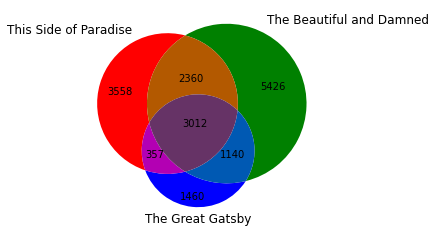

In [39]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

v = venn3([tsop_set, tbad_set, tgg_set], ('This Side of Paradise', 'The Beautiful and Damned', 'The Great Gatsby'), alpha = 1)
 
plt.show()

Conversation Frequencies 

In [41]:

def find_conv_ratio(text):
    text = re.sub(r"((?<=[^\w])\'|\'(?=[^\w]))", '"', text)
    conv_list = ' '.join(re.findall(r'\"[^\"]+\"', text)).split()
    all_list = text.split()
    return len(conv_list)/float(len(all_list))

In [42]:
print(find_conv_ratio(tsop_data))
print(find_conv_ratio(tbad_data))
print(find_conv_ratio(tgg_data))

0.5976175180850767
0.5483793689959994
0.48002886370389236


Word Frequencies

In [43]:
tsop_chars = [['Amory Blaine', 'Amory', 'Blaine', 'Mr. Blaine'], 
             ['Isabelle Borge', 'Borge','Isabelle', 'Mrs. Borge'],
             ['Rosalind Connage', 'Rosalind', 'Connage', 'Mrs. Connage'],
             ['Eleanor Savage', 'Eleanor', 'Savage'],
             ['Monsignor Darcy', 'Thayer Darcy'], 
             ['Beatrice Blaine', 'Beatrice', 'Mrs. Blaine', 'Blaine'],
             ['Clara Page', 'Clara', 'Mrs. Page'],
             ['Cecelia Connage', 'Cecelia', 'Connage'],
             ['Mrs. Connage', 'Connage'],
             ['Allenby'],
             ['Thomas Parke D’Invilliers']]
tbad_chars = [['Anthony Patch', 'Anthony', 'Mr. Patch'],
             ['Gloria Gilbert', 'Gloria'],
             ['Mrs. Gilbert'],
             ['Mr. Gilbert'],
             ['Richard Caramel', 'Richard', 'Caramel', 'Mr. Richard Caramel', 'Dick'],
             ['Joseph Bloeckman', 'Bloeckman'],
             ['Dot', 'Dorothy Raycroft', 'Dorothy'],
             ['Mrs. Raycroft']]
tgg_chars = [['Mr. Carraway', 'Nick', 'Carraway'],
            ['Jay Gatsby', 'Jay', 'Gatsby', 'Jimmy', 'James Gatz', 'Mr. Gatsby'],
            ['Daisy Buchanan', 'Daisy Fay', 'Mrs. Buchanan'],
            ['Tom Buchanan', 'Mr. Thomas Buchanan', 'Tom'],
            ['Jordan Baker', 'Jordan', 'Miss Baker'],
            ['George B. Wilson', 'George Wilson', 'Wilson'],
            ['Myrtle Wilson ', 'Myrtle'],
            ['Mrs. McKee']]

In [44]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

#remove character names/titles as well as stopwords
for name in {re.sub(r"\W", '', new_item) for sublist in tsop_chars+tbad_chars+tgg_chars for item in sublist for new_item in item.split()}:
    cachedStopWords.append(name.lower())

def tag_text(message):
    return nltk.pos_tag([word for word in re.findall(r"[a-z']+", message.lower()) if word not in cachedStopWords])

tsop_words = pd.DataFrame(tag_text(tsop_data), columns=['word', 'pos'])
tbad_words = pd.DataFrame(tag_text(tbad_data), columns=['word', 'pos'])
tgg_words = pd.DataFrame(tag_text(tgg_data), columns=['word', 'pos'])

In [45]:
def condense_pos(df):
    df.loc[df['pos'].isin(['JJS', 'JJR']), 'pos'] = 'JJ'
    df.loc[df['pos'].isin(['NNP', 'NNPS', 'NNS']), 'pos'] = 'NN'
    df.loc[df['pos'].isin(['RBR', 'RBS']), 'pos'] = 'RB'
    df.loc[df['pos'].isin(['VBD' 'VBG', 'VBN', 'VBP', 'VBZ']), 'pos'] = 'VB'
    return df.loc[df['pos'].isin(['JJ', 'NN', 'RB', 'VB'])]


In [46]:
tsop_words = condense_pos(tsop_words).groupby(['pos', 'word']).size().reset_index().sort_values(0, ascending=False).groupby('pos').head(5).sort_values(['pos', 0], ascending=[True, False])
tsop_words

,pos,word,0
1390,JJ,little,119
990,JJ,good,102
1010,JJ,great,91
1653,JJ,old,90
1317,JJ,last,83
5443,NN,night,138
5192,NN,man,120
4179,NN,eyes,98
3794,NN,day,89
5654,NN,people,88


In [47]:
tbad_words = condense_pos(tbad_words).groupby(['pos', 'word']).size().reset_index().sort_values(0, ascending=False).groupby('pos').head(5).sort_values(['pos', 0], ascending=[True, False])
tbad_words

,pos,word,0
1883,JJ,little,203
2134,JJ,new,150
3733,JJ,young,139
2219,JJ,old,139
1798,JJ,last,125
7042,NN,man,242
9300,NN,time,227
7101,NN,maury,183
7145,NN,men,182
5199,NN,day,177


In [48]:
tgg_words = condense_pos(tgg_words).groupby(['pos', 'word']).size().reset_index().sort_values(0, ascending=False).groupby('pos').head(5).sort_values(['pos', 0], ascending=[True, False])
tgg_words

,pos,word,0
907,JJ,little,95
1067,JJ,old,82
1020,JJ,new,70
1726,JJ,white,47
862,JJ,last,45
3283,NN,man,108
3024,NN,house,95
2677,NN,eyes,87
4302,NN,time,83
4482,NN,way,75


Topic Modelling

In [49]:
tsop_updated = open("This Side of Paradise_updated.txt", "w")
tsop_updated.write(tsop_data)
tsop_updated.close()

tsop_read = open("This Side of Paradise_updated.txt", 'r').read().replace('"',' ').replace('’','\'').split('\n\n') 
text = [x.lower().replace('\n', ' ') for x in tsop_read if len(x)>500]

In [50]:
from textblob import TextBlob
from nltk.corpus import stopwords 
from textblob import Word

stop_words = set(stopwords.words('english')) 

text_no_sw = []

for sent in tsop_read:
    tokens = ' '.join(TextBlob(sent).noun_phrases).split()
    cleaned_sent=[]
    for w in tokens:
        w = Word(w).lemmatize()
        if w not in stop_words and len(w)>4:
            cleaned_sent.append(w)
    if len(cleaned_sent)!=0:
        text_no_sw.append(' '.join(cleaned_sent))

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_topics(components, feature_names, n=50):
    for idx, topic in enumerate(components):
        print("\nTopic %d: " % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
        
vectorizer = TfidfVectorizer(max_features=1000) 
X = vectorizer.fit_transform(text_no_sw)

In [52]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=10, init='random', random_state=0)
nmf_top = nmf_model.fit_transform(X)

In [53]:
terms = vectorizer.get_feature_names() 
get_topics(nmf_model.components_,terms)


Topic 1:  [('amory', 6.14), ('rosalind', 1.38), ('burne', 0.61), ('great', 0.55), ('isabelle', 0.53), ('kerry', 0.43), ('connage', 0.36), ('princeton', 0.35), ('night', 0.33), ('monsignor', 0.3), ('eleanor', 0.3), ('beatrice', 0.3), ('cecelia', 0.29), ('thing', 0.25), ('voice', 0.24), ('blaine', 0.23), ('light', 0.2), ('clara', 0.2), ('sloane', 0.2), ('white', 0.19), ('young', 0.19), ('class', 0.18), ('to', 0.18), ('summer', 0.17), ('regis', 0.17), ('gillespie', 0.17), ('people', 0.15), ('sudden', 0.14), ('sally', 0.13), ('whole', 0.13), ('faint', 0.12), ('holiday', 0.12), ('woman', 0.11), ('american', 0.11), ('school', 0.11), ('social', 0.11), ('golden', 0.11), ('street', 0.11), ('mother', 0.1), ('ryder', 0.1), ('darcy', 0.1), ('freshman', 0.1), ('crowd', 0.1), ('window', 0.1), ('small', 0.1), ('black', 0.1), ('senior', 0.09), ('football', 0.09), ('princetonian', 0.09), ('olson', 0.08)]

Topic 2:  [('electric', 0.07), ('geneva', 0.07), ('heavy', 0.06), ('entire', 0.06), ('sheet', 0.0

c:\Users\anita\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


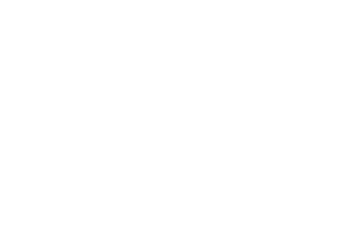

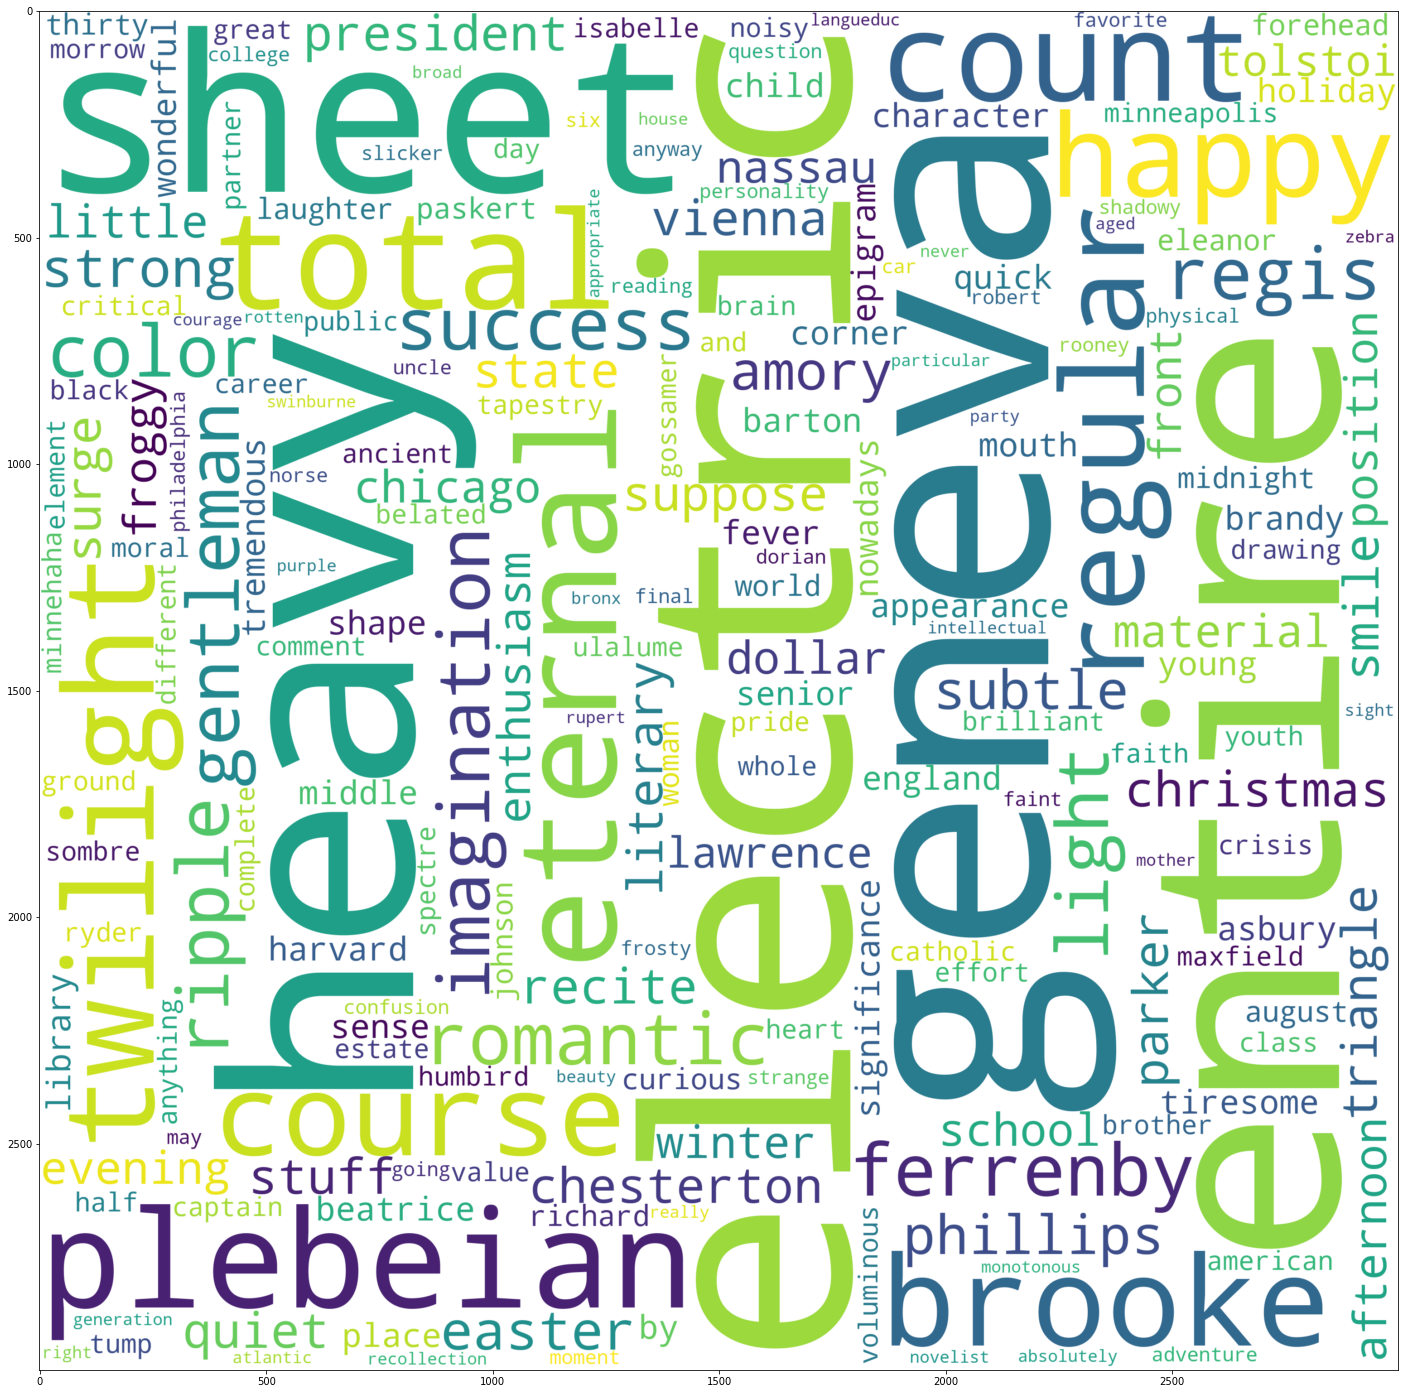

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
    

for idx, topic in enumerate(nmf_model.components_):
    if idx == 1:
        topic_x = [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-1000 - 1:-1]]
        topic_x = {i[0]:i[1] for i in topic_x}
            
wordcloud = WordCloud(width = 3000, height = 3000, stopwords=STOPWORDS, background_color="white", min_font_size = 30)
wordcloud = wordcloud.generate_from_frequencies(topic_x)

plt.axis("off")
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [58]:
tbad_updated = open("The Beautiful and Damned_updated.txt", "w")
tbad_updated.write(tbad_data)
tbad_updated.close()

tbad_read = open("The Beautiful and Damned_updated.txt", 'r').read().replace('"',' ').replace('’','\'').split('\n\n') 
text = [x.lower().replace('\n', ' ') for x in tbad_read if len(x)>500]

In [59]:
from textblob import TextBlob
from nltk.corpus import stopwords 
from textblob import Word

stop_words = set(stopwords.words('english')) 

text_no_sw = []

for sent in tbad_read:
    tokens = ' '.join(TextBlob(sent).noun_phrases).split()
    cleaned_sent=[]
    for w in tokens:
        w = Word(w).lemmatize()
        if w not in stop_words and len(w)>4:
            cleaned_sent.append(w)
    if len(cleaned_sent)!=0:
        text_no_sw.append(' '.join(cleaned_sent))

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_topics(components, feature_names, n=50):
    for idx, topic in enumerate(components):
        print("\nTopic %d: " % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
        
vectorizer = TfidfVectorizer(max_features=1000) 
X = vectorizer.fit_transform(text_no_sw)


In [61]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=10, init='random', random_state=0)
nmf_top = nmf_model.fit_transform(X)

c:\Users\anita\lib\site-packages\sklearn\decomposition\_nmf.py:117: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)


In [62]:
terms = vectorizer.get_feature_names() 
get_topics(nmf_model.components_,terms)


Topic 1:  [('anthony', 9.51), ('gloria', 5.87), ('maury', 2.0), ('young', 0.94), ('bloeckman', 0.92), ('patch', 0.86), ('muriel', 0.7), ('caramel', 0.69), ('great', 0.65), ('paramore', 0.64), ('richard', 0.62), ('gilbert', 0.51), ('house', 0.45), ('thing', 0.43), ('rachael', 0.4), ('voice', 0.4), ('woman', 0.37), ('night', 0.34), ('dozen', 0.34), ('white', 0.31), ('people', 0.26), ('short', 0.26), ('marietta', 0.24), ('bound', 0.23), ('yellow', 0.21), ('matter', 0.2), ('certain', 0.2), ('black', 0.2), ('light', 0.2), ('noble', 0.2), ('shuttleworth', 0.19), ('silence', 0.18), ('street', 0.18), ('hello', 0.18), ('harvard', 0.18), ('geraldine', 0.17), ('little', 0.17), ('forty', 0.17), ('haight', 0.16), ('beauty', 0.16), ('story', 0.15), ('front', 0.15), ('officer', 0.15), ('faint', 0.14), ('summer', 0.14), ('apartment', 0.13), ('large', 0.13), ('joseph', 0.13), ('to', 0.13), ('pleasant', 0.13)]

Topic 2:  [('inevitable', 0.08), ('effort', 0.08), ('general', 0.07), ('small', 0.07), ('cas

c:\Users\anita\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


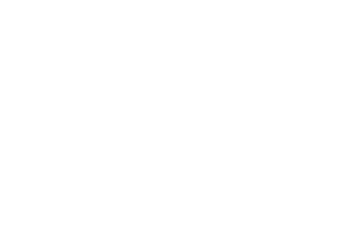

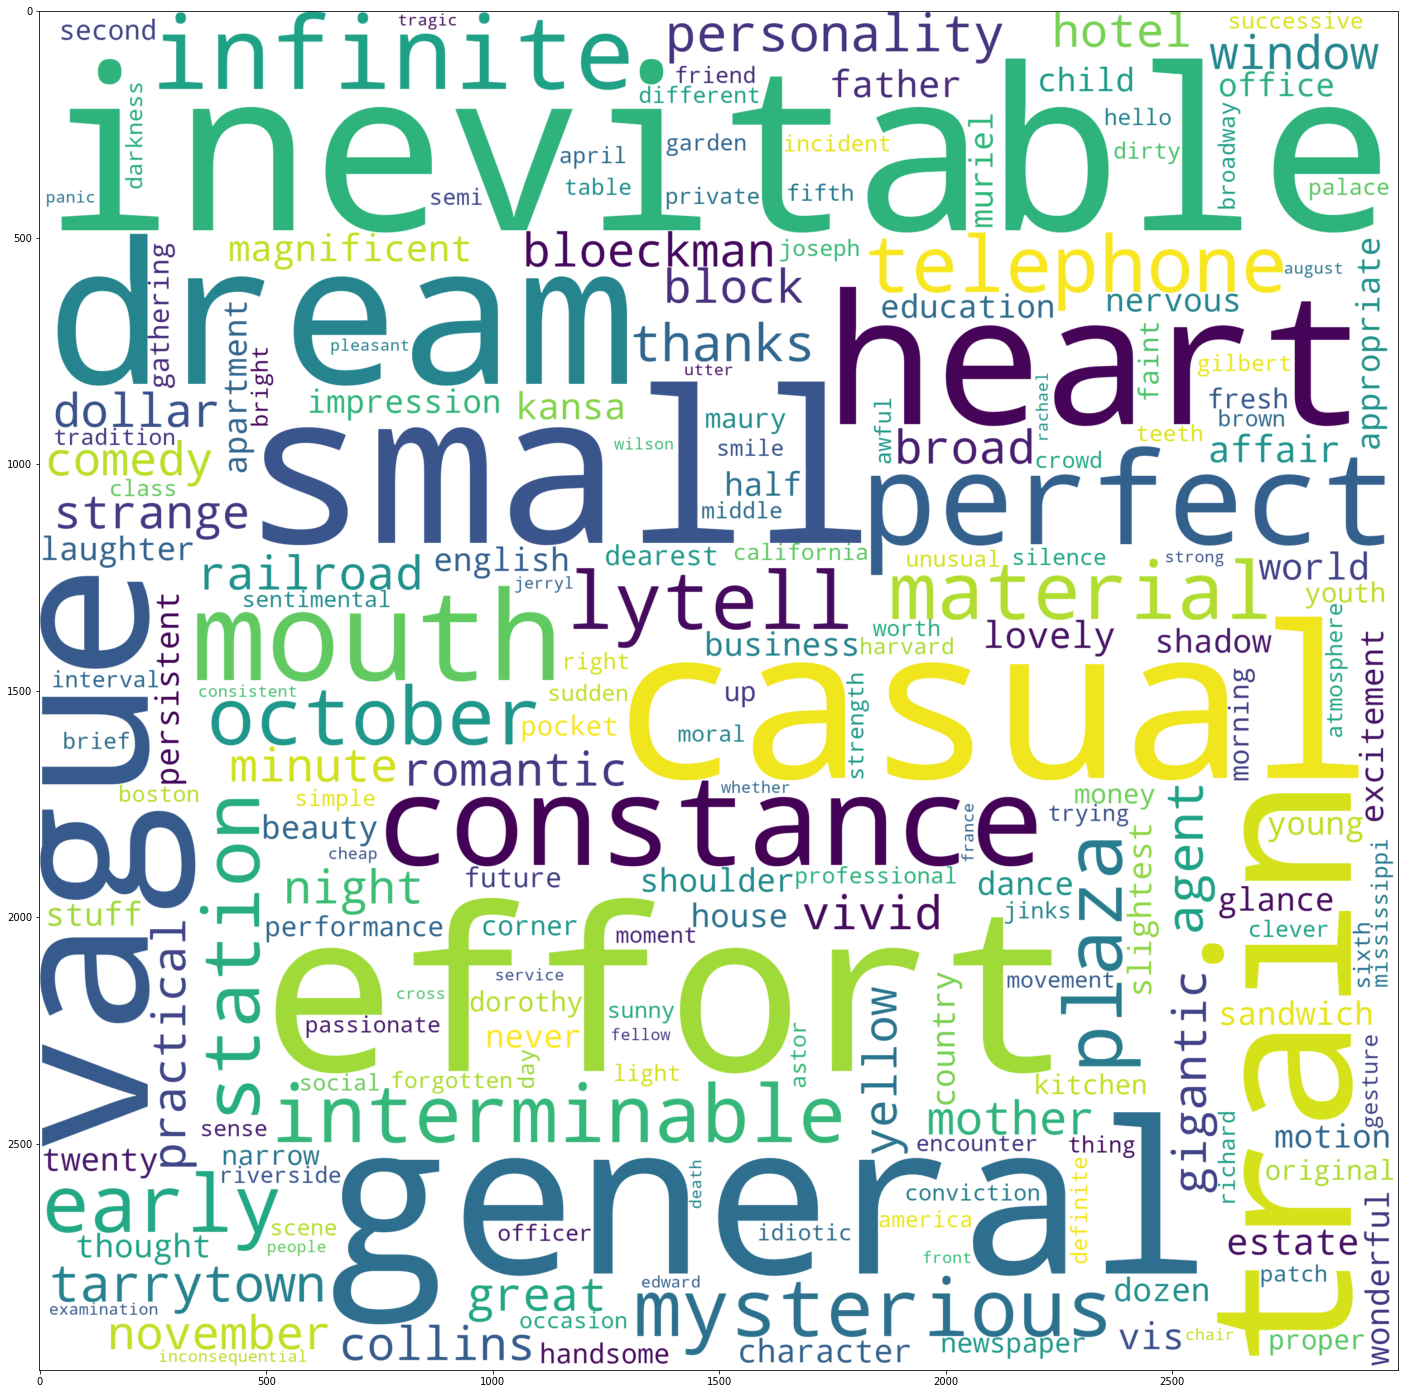

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
    

for idx, topic in enumerate(nmf_model.components_):
    if idx == 1:
        topic_x = [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-1000 - 1:-1]]
        topic_x = {i[0]:i[1] for i in topic_x}
            
wordcloud = WordCloud(width = 3000, height = 3000, stopwords=STOPWORDS, background_color="white", min_font_size = 30)
wordcloud = wordcloud.generate_from_frequencies(topic_x)

plt.axis("off")
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [65]:
tgg_updated = open("The Great Gatsby_updated.txt", "w")
tgg_updated.write(tgg_data)
tgg_updated.close()

tgg_read = open("The Great Gatsby_updated.txt", 'r').read().replace('"',' ').replace('’','\'').split('\n\n') 
text = [x.lower().replace('\n', ' ') for x in tgg_read if len(x)>500]

In [66]:
from textblob import TextBlob
from nltk.corpus import stopwords 
from textblob import Word

stop_words = set(stopwords.words('english')) 

text_no_sw = []

for sent in tgg_read:
    tokens = ' '.join(TextBlob(sent).noun_phrases).split()
    cleaned_sent=[]
    for w in tokens:
        w = Word(w).lemmatize()
        if w not in stop_words and len(w)>4:
            cleaned_sent.append(w)
    if len(cleaned_sent)!=0:
        text_no_sw.append(' '.join(cleaned_sent))

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_topics(components, feature_names, n=50):
    for idx, topic in enumerate(components):
        print("\nTopic %d: " % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
        
vectorizer = TfidfVectorizer(max_features=1000) 
X = vectorizer.fit_transform(text_no_sw)


In [68]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=10, init='random', random_state=0)
nmf_top = nmf_model.fit_transform(X)

c:\Users\anita\lib\site-packages\sklearn\decomposition\_nmf.py:117: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(res * 2)


In [69]:
terms = vectorizer.get_feature_names() 
get_topics(nmf_model.components_,terms)


Topic 1:  [('gatsby', 9.45), ('daisy', 6.73), ('wilson', 2.7), ('jordan', 2.52), ('sport', 1.65), ('baker', 1.39), ('white', 1.24), ('young', 1.09), ('wolfshiem', 1.05), ('house', 0.99), ('voice', 0.93), ('small', 0.92), ('buchanan', 0.84), ('myrtle', 0.79), ('thing', 0.72), ('michaelis', 0.71), ('great', 0.68), ('chicago', 0.62), ('people', 0.6), ('night', 0.58), ('whole', 0.54), ('mckee', 0.52), ('window', 0.48), ('front', 0.47), ('yellow', 0.46), ('catherine', 0.45), ('dozen', 0.45), ('island', 0.44), ('the', 0.44), ('oxford', 0.42), ('george', 0.38), ('sound', 0.36), ('woman', 0.35), ('party', 0.34), ('world', 0.33), ('carraway', 0.31), ('business', 0.3), ('bright', 0.3), ('light', 0.29), ('certain', 0.26), ('dress', 0.26), ('little', 0.26), ('morning', 0.25), ('place', 0.24), ('sloane', 0.23), ('please', 0.23), ('shook', 0.22), ('short', 0.22), ('that', 0.21), ('table', 0.21)]

Topic 2:  [('history', 0.07), ('green', 0.07), ('physical', 0.07), ('circle', 0.07), ('square', 0.06), 

c:\Users\anita\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


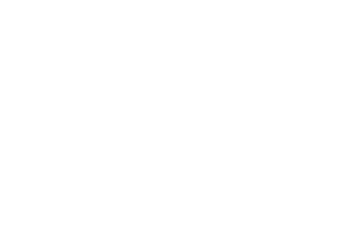

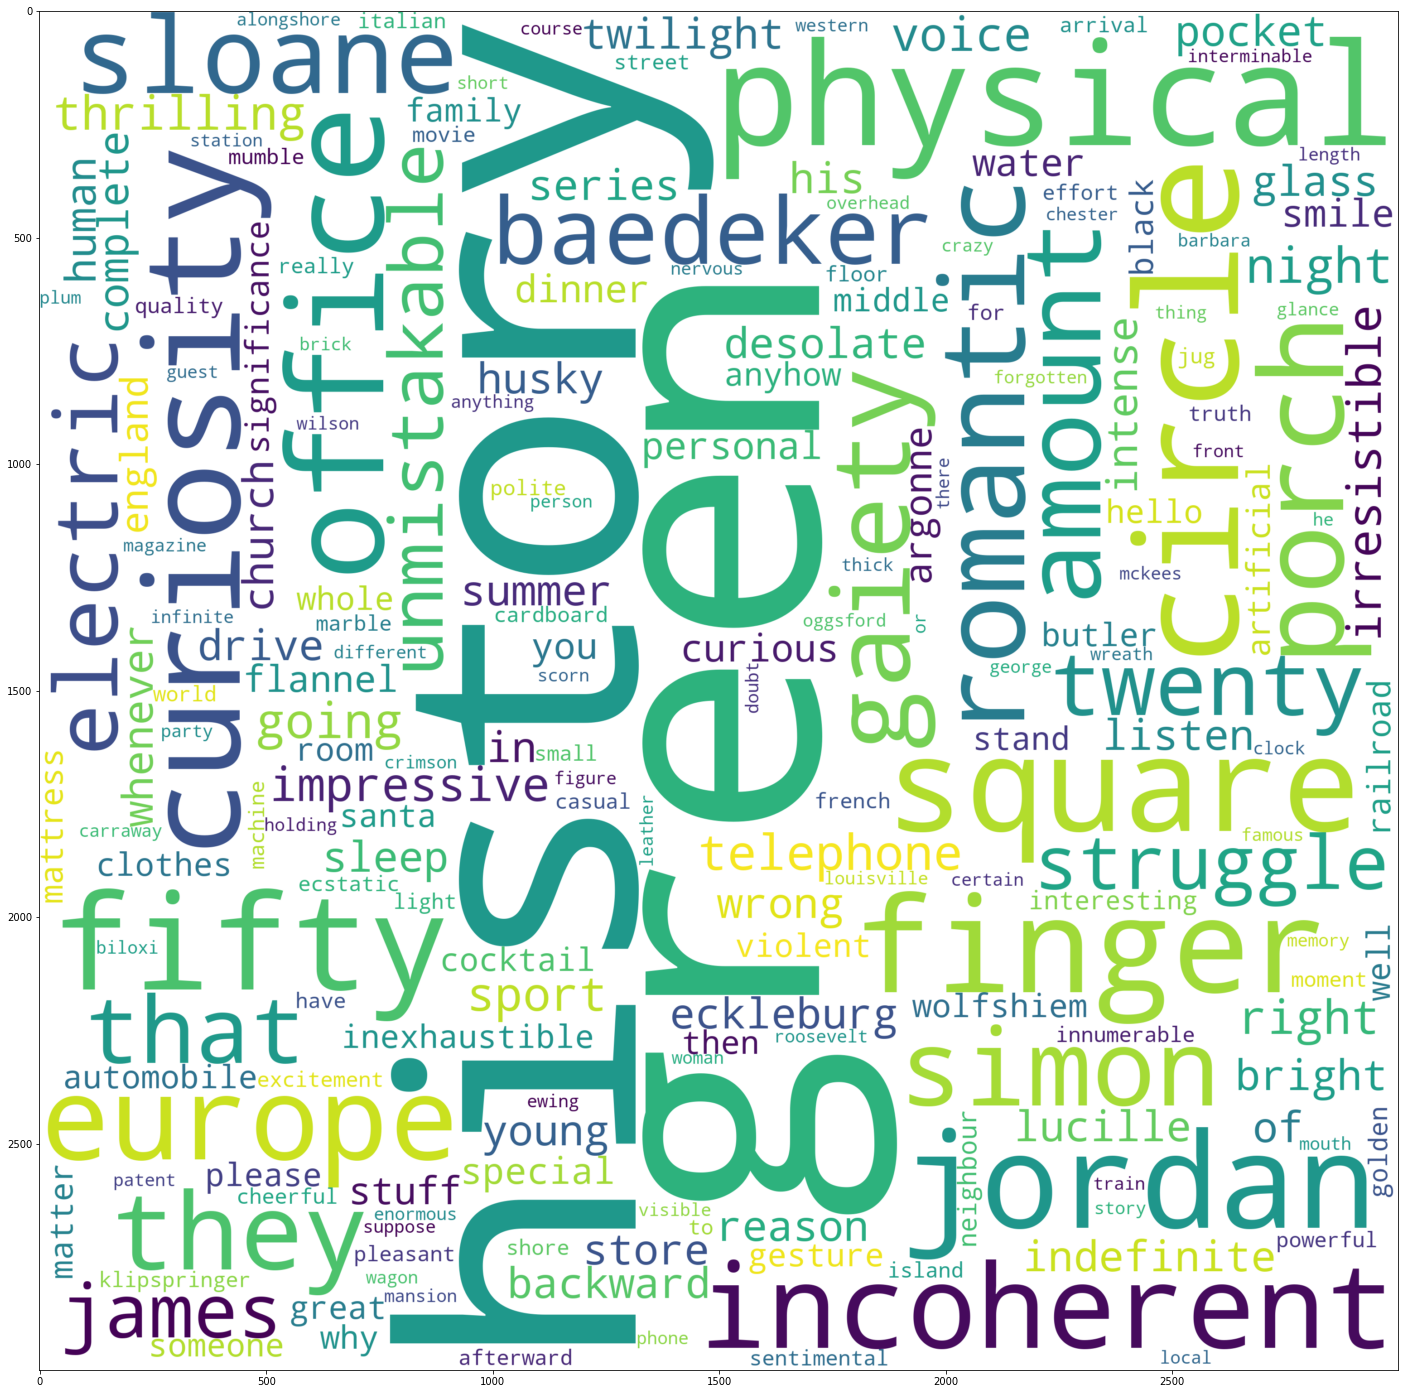

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
    

for idx, topic in enumerate(nmf_model.components_):
    if idx == 1:
        topic_x = [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-1000 - 1:-1]]
        topic_x = {i[0]:i[1] for i in topic_x}
            
wordcloud = WordCloud(width = 3000, height = 3000, stopwords=STOPWORDS, background_color="white", min_font_size = 30)
wordcloud = wordcloud.generate_from_frequencies(topic_x)

plt.axis("off")
plt.figure(figsize=(25, 25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

Sentiment of Sentences Looking using VADER Library

In [99]:
import nltk


sentences = nltk.sent_tokenize(tsop_data)  

#sentence_list

df_sentences = pd.DataFrame(sentences,columns=['Sentence'])
df_sentences

,Sentence
0,The Romantic Egotist .
1,"Amory, Son of Beatrice Amory Blaine inherited ..."
2,"His father, an ineffectual, inarticulate man w..."
3,"In consequence, Stephen Blaine handed down to ..."
4,For many years he hovered in the background of...
...,...
4832,Never again could he find even the sombre luxu...
4833,"So far as he was concerned, young Rosalind was..."
4834,"A day later came a crisp, terse letter from Mr..."
4835,"Last of all, on a dazed Sunday night, a telegr..."


In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [101]:
# Get intensity scores of each sentence
df_sentences['Score']=df_sentences.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
df_sentences['CompScore']=df_sentences.Score.apply(lambda x: x.get("compound"))
df_sentences['PosScore']=df_sentences.Score.apply(lambda x: x.get("pos"))
df_sentences['NegScore']=df_sentences.Score.apply(lambda x: x.get("neg"))
df_sentences['NeutScore']=df_sentences.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
df_sentences = df_sentences.drop(["Score"], axis=1)

# Adding Sentiment Flags
df_sentences['PosFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_sentences['NegFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_sentences['NeutFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Confirm scores are
df_sentences.head(20)
df_sentences.mean()['CompScore']

C:\Users\anita\AppData\Local\Temp\ipykernel_30680\4162156139.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sentences.mean()['CompScore']


0.0692374612363035

In [102]:
df_sentences

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,The Romantic Egotist .,-0.1531,0.386,0.471,0.143,0,1,0
1,"Amory, Son of Beatrice Amory Blaine inherited ...",0.2263,0.083,0.000,0.917,1,0,0
2,"His father, an ineffectual, inarticulate man w...",0.1779,0.128,0.100,0.772,1,0,0
3,"In consequence, Stephen Blaine handed down to ...",0.0000,0.000,0.000,1.000,0,0,1
4,For many years he hovered in the background of...,-0.0772,0.069,0.075,0.857,0,1,0
...,...,...,...,...,...,...,...,...
4832,Never again could he find even the sombre luxu...,-0.2960,0.079,0.099,0.822,0,1,0
4833,"So far as he was concerned, young Rosalind was...",-0.6486,0.000,0.323,0.677,0,1,0
4834,"A day later came a crisp, terse letter from Mr...",-0.2960,0.000,0.059,0.941,0,1,0
4835,"Last of all, on a dazed Sunday night, a telegr...",-0.6808,0.000,0.237,0.763,0,1,0


In [103]:
print('There are', df_sentences['PosFlag'].sum(), "positive sentences,", \
      df_sentences['NegFlag'].sum(), "negative sentences, and", \
      df_sentences['NeutFlag'].sum(), "neutral sentences")
print('In total there are', \
      df_sentences['PosFlag'].sum()+df_sentences['NegFlag'].sum()+df_sentences['NeutFlag'].sum(), "sentences")

There are 1607 positive sentences, 1036 negative sentences, and 2194 neutral sentences
In total there are 4837 sentences


In [104]:
# Creating tables of positive and negative sentences

# Pull out rows with positive flag only
PosTable = df_sentences.loc[df_sentences['PosFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

 #Pull out rows with negative flag only
NegTable = df_sentences.loc[df_sentences['NegFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

In [105]:
PosTable

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,"Amory, Son of Beatrice Amory Blaine inherited ...",0.2263,0.083,0.000,0.917,1,0,0
1,"His father, an ineffectual, inarticulate man w...",0.1779,0.128,0.100,0.772,1,0,0
2,A brilliant education she hadher youth passed ...,0.8553,0.172,0.029,0.799,1,0,0
3,All in all Beatrice O’Hara absorbed the sort o...,0.8910,0.208,0.074,0.718,1,0,0
4,When Amory was five he was already a delightfu...,0.5859,0.275,0.000,0.725,1,0,0
...,...,...,...,...,...,...,...,...
1602,He probably won’t want to be any moreand never...,0.0772,0.115,0.000,0.885,1,0,0
1603,Is he pretty important?,0.6124,0.714,0.000,0.286,1,0,0
1604,"Kinda more important than you are?""",0.2058,0.266,0.000,0.734,1,0,0
1605,Amory laughed.,0.4588,0.750,0.000,0.250,1,0,0


In [106]:
NegTable

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,The Romantic Egotist .,-0.1531,0.386,0.471,0.143,0,1,0
1,For many years he hovered in the background of...,-0.0772,0.069,0.075,0.857,0,1,0
2,In her less important moments she returned to ...,-0.4830,0.052,0.159,0.789,0,1,0
3,From his fourth to his tenth year he did the c...,-0.5915,0.000,0.099,0.901,0,1,0
4,I’ve always suspected that early rising in ear...,-0.4588,0.000,0.286,0.714,0,1,0
...,...,...,...,...,...,...,...,...
1031,Until now he had half unconsciously cherished ...,-0.6369,0.116,0.213,0.672,0,1,0
1032,Never again could he find even the sombre luxu...,-0.2960,0.079,0.099,0.822,0,1,0
1033,"So far as he was concerned, young Rosalind was...",-0.6486,0.000,0.323,0.677,0,1,0
1034,"A day later came a crisp, terse letter from Mr...",-0.2960,0.000,0.059,0.941,0,1,0


In [107]:
import nltk


sentences = nltk.sent_tokenize(tbad_data)  

#sentence_list

df_sentences = pd.DataFrame(sentences,columns=['Sentence'])
df_sentences


,Sentence
0,"In 1913, when Anthony Patch was twenty-five,..."
1,"Irony was the final polish of the shoe, the ul..."
2,yet at the brink of this story he has as yet g...
3,As you first see him he wonders frequently whe...
4,This was his healthy state and it made him che...
...,...
8258,"Why, the very friends who had been most unkind..."
8259,Had not the Lacys and the Merediths and the Ca...
8260,"Great tears stood in his eyes, and his voice w..."
8261,"""I showed them,"" he was saying."


In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [109]:
# Get intensity scores of each sentence
df_sentences['Score']=df_sentences.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
df_sentences['CompScore']=df_sentences.Score.apply(lambda x: x.get("compound"))
df_sentences['PosScore']=df_sentences.Score.apply(lambda x: x.get("pos"))
df_sentences['NegScore']=df_sentences.Score.apply(lambda x: x.get("neg"))
df_sentences['NeutScore']=df_sentences.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
df_sentences = df_sentences.drop(["Score"], axis=1)

# Adding Sentiment Flags
df_sentences['PosFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_sentences['NegFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_sentences['NeutFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Confirm scores are
df_sentences.head(20)
df_sentences.mean()['CompScore']

C:\Users\anita\AppData\Local\Temp\ipykernel_30680\4162156139.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sentences.mean()['CompScore']


0.039202420428415825

In [110]:
df_sentences

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,"In 1913, when Anthony Patch was twenty-five,...",-0.3612,0.000,0.119,0.881,0,1,0
1,"Irony was the final polish of the shoe, the ul...",0.4765,0.161,0.059,0.781,1,0,0
2,yet at the brink of this story he has as yet g...,-0.2960,0.000,0.115,0.885,0,1,0
3,As you first see him he wonders frequently whe...,0.5943,0.184,0.114,0.701,1,0,0
4,This was his healthy state and it made him che...,0.9428,0.499,0.000,0.501,1,0,0
...,...,...,...,...,...,...,...,...
8258,"Why, the very friends who had been most unkind...",0.5574,0.229,0.102,0.669,1,0,0
8259,Had not the Lacys and the Merediths and the Ca...,0.0000,0.000,0.000,1.000,0,0,1
8260,"Great tears stood in his eyes, and his voice w...",0.2960,0.195,0.186,0.619,1,0,0
8261,"""I showed them,"" he was saying.",0.0000,0.000,0.000,1.000,0,0,1


In [111]:
print('There are', df_sentences['PosFlag'].sum(), "positive sentences,", \
      df_sentences['NegFlag'].sum(), "negative sentences, and", \
      df_sentences['NeutFlag'].sum(), "neutral sentences")
print('In total there are', \
      df_sentences['PosFlag'].sum()+df_sentences['NegFlag'].sum()+df_sentences['NeutFlag'].sum(), "sentences")

There are 2556 positive sentences, 2112 negative sentences, and 3595 neutral sentences
In total there are 8263 sentences


In [112]:
# Creating tables of positive and negative sentences

# Pull out rows with positive flag only
PosTable = df_sentences.loc[df_sentences['PosFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

 #Pull out rows with negative flag only
NegTable = df_sentences.loc[df_sentences['NegFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

In [113]:
PosTable

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,"Irony was the final polish of the shoe, the ul...",0.4765,0.161,0.059,0.781,1,0,0
1,As you first see him he wonders frequently whe...,0.5943,0.184,0.114,0.701,1,0,0
2,This was his healthy state and it made him che...,0.9428,0.499,0.000,0.501,1,0,0
3,In this state he considered that he would one ...,0.7430,0.233,0.081,0.686,1,0,0
4,Until the time came for this effort he would b...,0.9413,0.290,0.099,0.611,1,0,0
...,...,...,...,...,...,...,...,...
2551,"Anthony Patch, sitting near the rail and looki...",0.7906,0.132,0.000,0.868,1,0,0
2552,No he was concerned with a series of reminisce...,0.3818,0.152,0.088,0.760,1,0,0
2553,But he had known that he was justified in his ...,0.2617,0.148,0.104,0.748,1,0,0
2554,"Why, the very friends who had been most unkind...",0.5574,0.229,0.102,0.669,1,0,0


In [114]:
NegTable

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,"In 1913, when Anthony Patch was twenty-five,...",-0.3612,0.000,0.119,0.881,0,1,0
1,yet at the brink of this story he has as yet g...,-0.2960,0.000,0.115,0.885,0,1,0
2,"He came home from the war a major, charged int...",-0.7845,0.077,0.293,0.630,0,1,0
3,"It was then that he determined, after a severe...",-0.5106,0.080,0.189,0.731,0,1,0
4,"His mind, under the influence of that insidiou...",-0.8573,0.000,0.253,0.747,0,1,0
...,...,...,...,...,...,...,...,...
2107,"""Probably...."" But the man in the plaid cap wa...",-0.6798,0.000,0.315,0.685,0,1,0
2108,They had tried to penalize him for the mistake...,-0.3612,0.000,0.185,0.815,0,1,0
2109,"He had been alone, alone facing it all.",-0.4588,0.000,0.400,0.600,0,1,0
2110,Only a few months before people had been urgin...,-0.0772,0.000,0.064,0.936,0,1,0


In [115]:
import nltk


sentences = nltk.sent_tokenize(tgg_data)  

#sentence_list

df_sentences = pd.DataFrame(sentences,columns=['Sentence'])
df_sentences

,Sentence
0,In my younger and more vulnerable years my fa...
1,"""Whenever you feel like criticizing anyone,"" h..."
2,"He didn't say any more, but we've always been ..."
3,"In consequence, I'm inclined to reserve all ju..."
4,The abnormal mind is quick to detect and attac...
...,...
3403,"And as sat there brooding on the old, unknown..."
3404,"He had come a long way to this blue lawn, and ..."
3405,He did not know that it was already behind him...
3406,"Gatsby believed in the green light, the orgast..."


In [116]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [117]:
# Get intensity scores of each sentence
df_sentences['Score']=df_sentences.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
df_sentences['CompScore']=df_sentences.Score.apply(lambda x: x.get("compound"))
df_sentences['PosScore']=df_sentences.Score.apply(lambda x: x.get("pos"))
df_sentences['NegScore']=df_sentences.Score.apply(lambda x: x.get("neg"))
df_sentences['NeutScore']=df_sentences.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
df_sentences = df_sentences.drop(["Score"], axis=1)

# Adding Sentiment Flags
df_sentences['PosFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_sentences['NegFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_sentences['NeutFlag'] = df_sentences.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

# Confirm scores are
df_sentences.head(20)
df_sentences.mean()['CompScore']

C:\Users\anita\AppData\Local\Temp\ipykernel_30680\4162156139.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sentences.mean()['CompScore']


0.03055580985915493

In [118]:
df_sentences

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,In my younger and more vulnerable years my fa...,-0.2944,0.000,0.091,0.909,0,1,0
1,"""Whenever you feel like criticizing anyone,"" h...",-0.2755,0.086,0.158,0.756,0,1,0
2,"He didn't say any more, but we've always been ...",0.7684,0.197,0.000,0.803,1,0,0
3,"In consequence, I'm inclined to reserve all ju...",0.2874,0.132,0.065,0.803,1,0,0
4,The abnormal mind is quick to detect and attac...,-0.2960,0.000,0.049,0.951,0,1,0
...,...,...,...,...,...,...,...,...
3403,"And as sat there brooding on the old, unknown...",0.0258,0.039,0.000,0.961,0,0,1
3404,"He had come a long way to this blue lawn, and ...",-0.2975,0.071,0.114,0.815,0,1,0
3405,He did not know that it was already behind him...,0.0000,0.000,0.000,1.000,0,0,1
3406,"Gatsby believed in the green light, the orgast...",0.0000,0.000,0.000,1.000,0,0,1


In [119]:
print('There are', df_sentences['PosFlag'].sum(), "positive sentences,", \
      df_sentences['NegFlag'].sum(), "negative sentences, and", \
      df_sentences['NeutFlag'].sum(), "neutral sentences")
print('In total there are', \
      df_sentences['PosFlag'].sum()+df_sentences['NegFlag'].sum()+df_sentences['NeutFlag'].sum(), "sentences")

There are 938 positive sentences, 751 negative sentences, and 1719 neutral sentences
In total there are 3408 sentences


In [120]:
# Creating tables of positive and negative sentences

# Pull out rows with positive flag only
PosTable = df_sentences.loc[df_sentences['PosFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

 #Pull out rows with negative flag only
NegTable = df_sentences.loc[df_sentences['NegFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

In [121]:
PosTable

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,"He didn't say any more, but we've always been ...",0.7684,0.197,0.000,0.803,1,0,0
1,"In consequence, I'm inclined to reserve all ju...",0.2874,0.132,0.065,0.803,1,0,0
2,Reserving judgements is a matter of infinite h...,0.4588,0.444,0.000,0.556,1,0,0
3,"And, after boasting this way of my tolerance, ...",0.2960,0.128,0.000,0.872,1,0,0
4,When came back from the East last autumn fel...,0.1779,0.074,0.056,0.870,1,0,0
...,...,...,...,...,...,...,...,...
933,"By God it was awful—"" couldn't forgive him or...",0.7080,0.263,0.051,0.686,1,0,0
934,spent my Saturday nights in New York because t...,0.7096,0.126,0.000,0.874,1,0,0
935,Probably it was some final guest who had been ...,0.4019,0.105,0.000,0.895,1,0,0
936,And as the moon rose higher the inessential ho...,0.3182,0.062,0.000,0.938,1,0,0


In [122]:
NegTable

,Sentence,CompScore,PosScore,NegScore,NeutScore,PosFlag,NegFlag,NeutFlag
0,In my younger and more vulnerable years my fa...,-0.2944,0.000,0.091,0.909,0,1,0
1,"""Whenever you feel like criticizing anyone,"" h...",-0.2755,0.086,0.158,0.756,0,1,0
2,The abnormal mind is quick to detect and attac...,-0.2960,0.000,0.049,0.951,0,1,0
3,Most of the confidences were unsought—frequent...,-0.3818,0.000,0.048,0.952,0,1,0
4,am still a little afraid of missing something ...,-0.7380,0.000,0.248,0.752,0,1,0
...,...,...,...,...,...,...,...,...
746,"One night did hear a material car there, and ...",-0.2960,0.000,0.128,0.872,0,1,0
747,"On the last night, with my trunk packed and my...",-0.2500,0.073,0.104,0.823,0,1,0
748,"On the white steps an obscene word, scrawled b...",-0.2732,0.076,0.107,0.817,0,1,0
749,"He had come a long way to this blue lawn, and ...",-0.2975,0.071,0.114,0.815,0,1,0


Looking at Most Frequent Nouns

In [1001]:
from nltk import pos_tag, word_tokenize

def read_text():
    with open('The Great Gatsby.txt', 'r') as f:
        book = f.read()
    f.close
    return book

def text_tokenize(book):
    tokenize = word_tokenize(book)
    print(tokenize)
    return tokenize 

def tagging(tokenize):
    proper_nouns = []
    tag = pos_tag(tokenize)
    for word_tuple in tag:
        if word_tuple[1] == 'NNP':
            proper_nouns.append(word_tuple[0])
    return set(proper_nouns)


In [41]:
txt = tgg_data

pos = nltk.pos_tag(nltk.word_tokenize(txt))
pos = np.array(pos).transpose()

nouns = pos[0][pos[1] == 'NNP'] #looking at Nouns
nouns = pd.Series(nouns)
nouns_df = pd.DataFrame(nouns)

for i in ['Mr.','Mrs.', "Miss","’", '…' , ',', '”', '“', '*', 'Oh','Egg','New','York','West','East',"Come", "Well", "God", "Did", "Island", "Chicago", "Oxford", "Long", "Buchanan"]: #removes these from the nouns we are looking at -- irrelevant
    nouns = nouns.loc[nouns != i]

nouns_df = nouns_df.rename(columns={0: "Word"})

top_twelve_series = nouns.value_counts().sort_values(ascending = False)[:12] #top twelve most frequent nouns
top_twelve_df = pd.DataFrame(top_twelve_series)

top_twelve_df= top_twelve_df.reset_index() #resetting index - need index (nouns) as a column
top_twelve_df= top_twelve_df.rename(columns={"index": "Noun", 0: "Count"}) #renaming columns
top_twelve_df

,Noun,Count
0,Gatsby,247
1,Tom,186
2,Daisy,178
3,Wilson,77
4,Jordan,67
5,Baker,40
6,Wolfshiem,31
7,Myrtle,23
8,Nick,22
9,Michaelis,20


In [44]:
txt = tbad_data

pos = nltk.pos_tag(nltk.word_tokenize(txt))
pos = np.array(pos).transpose()

nouns = pos[0][pos[1] == 'NNP'] #looking at Nouns
nouns = pd.Series(nouns)
nouns_df = pd.DataFrame(nouns)

for i in ['Mr.','Mrs.', "Miss","’", '…' , ',', '”', '“', '*', '....', 'Well', 'New', 'York', 'Oh', 'God', 'Avenue', 'Street', 'YOUNG', 'MAURY', 'ANTHONY', 'PARAMORE', 'Harvard', 'Did', 'Hello', 'Sunday', 'Gilbert', 'Patch', 'Richard', 'Marietta', 'Noble']: #removes these from the nouns we are looking at -- irrelevant
    nouns = nouns.loc[nouns != i]

nouns_df = nouns_df.rename(columns={0: "Word"})

top_fourteen_series = nouns.value_counts().sort_values(ascending = False)[:14] #top fourteen most frequent nouns
top_fourteen_df = pd.DataFrame(top_fourteen_series)

top_fourteen_df= top_fourteen_df.reset_index() #resetting index - need index (nouns) as a column
top_fourteen_df= top_fourteen_df.rename(columns={"index": "Noun", 0: "Count"}) #renaming columns
top_fourteen_df

,Noun,Count
0,Anthony,866
1,Gloria,532
2,Dick,120
3,Maury,115
4,Bloeckman,95
5,Caramel,67
6,Muriel,56
7,Rachael,39
8,Adam,38
9,Dot,35


In [28]:
import nltk
from nltk import pos_tag, word_tokenize
import numpy as np
import pandas as pd

txt = tsop_data

pos = nltk.pos_tag(nltk.word_tokenize(txt))
pos = np.array(pos).transpose()

nouns = pos[0][pos[1] == 'NNP'] #looking at proper nouns
nouns = pd.Series(nouns)
nouns_df = pd.DataFrame(nouns)

for i in ['Mr.','Mrs.', "Miss","’", '…' , ',', '”', '“', '*', 'Well', 'St.', 'God', 'Oh', 'New', 'MRS.', 'York', 'Princeton', 'Regis', 'ROSALIND', 'Blaine', 'CONNAGE', 'Don']	: #removes these from the nouns we are looking at -- irrelevant
    nouns = nouns.loc[nouns != i]

nouns_df = nouns_df.rename(columns={0: "Word"})

top_twelve_series = nouns.value_counts().sort_values(ascending = False)[:12] #top twelve most frequent proper nouns
top_twelve_df = pd.DataFrame(top_twelve_series)

top_twelve_df= top_twelve_df.reset_index() #resetting index - need index (nouns) as a column
top_twelve_df= top_twelve_df.rename(columns={"index": "Noun", 0: "Count"}) #renaming columns
top_twelve_df

,Noun,Count
0,Amory,674
1,Tom,88
2,Burne,80
3,Isabelle,69
4,Alec,63
5,Kerry,60
6,Rosalind,45
7,Beatrice,40
8,Monsignor,39
9,Eleanor,37
